# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_csv('CHURN_CREDIT_MOD08_PART2.csv')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,ServicoTelefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,MetodoPagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,FEMALE,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,MALE,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,MALE,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,MALE,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,8191-XWSZG,F,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,NaN,1022.95,No
5,9959-WOFKT,MALE,0,No,Yes,71,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),NaN,7382.25,No
6,4190-MFLUW,F,0,Yes,Yes,10,Yes,DSL,No,Yes,No,Month-to-month,Credit card (automatic),NaN,528.35,Yes
7,4183-MYFRB,F,0,No,No,21,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,1862.90,No
8,8779-QRDMV,MALE,1,No,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,NaN,39.65,Yes
9,1680-VDCWW,MALE,0,Yes,No,12,Yes,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),NaN,202.25,No


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [4]:
df.describe()

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,1006.000000,1006.000000,860.000000,1006.000000
mean,0.157058,32.861829,64.791453,2310.174652
std,0.364036,24.862924,30.092858,2311.330522
min,0.000000,1.000000,18.800000,18.800000
25%,0.000000,8.000000,35.687500,384.887500
50%,0.000000,30.000000,70.550000,1390.875000
75%,0.000000,56.000000,90.362500,3891.625000
max,1.000000,72.000000,118.650000,8564.750000


Não é possivel verificar apenas por esse describe se a outliers ou não, temos algumas variaveis que o media está bem proxima da mediana a unica que se distancia com um valaor considferavel é a variavel Total_Pago.

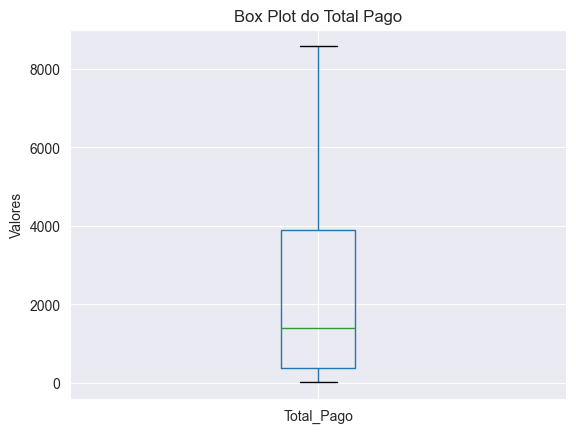

In [5]:
df.boxplot(column='Total_Pago')
plt.title('Box Plot do Total Pago')
plt.ylabel('Valores')
plt.show()

Vemos uma distribuição para valores mais inferiores refletindo a distancia vista entre a media e mediana no discribe no entretanto sem outliers

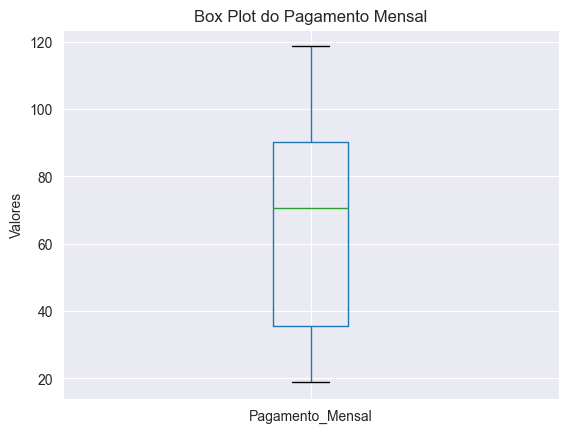

In [6]:
df.boxplot(column='Pagamento_Mensal')
plt.title('Box Plot do Pagamento Mensal')
plt.ylabel('Valores')
plt.show()

Não identifiquei nenhum outlier e temos uma boa distribuição dos valores

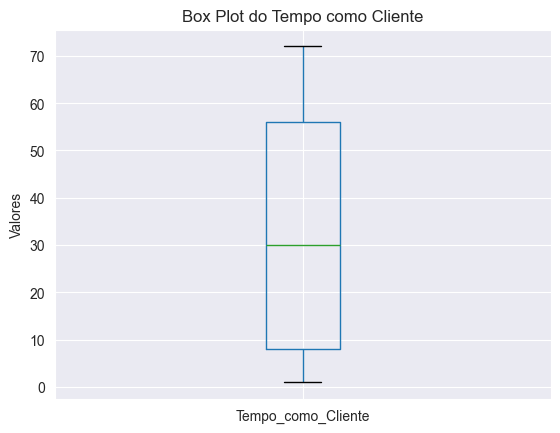

In [7]:
df.boxplot(column='Tempo_como_Cliente')
plt.title('Box Plot do Tempo como Cliente')
plt.ylabel('Valores')
plt.show()


Aqui também vemos uma boa distribuição de certa forma e sem outliers

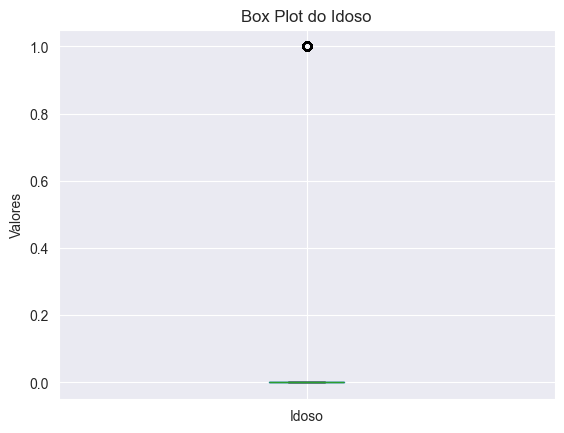

In [8]:
df.boxplot(column='Idoso')
plt.title('Box Plot do Idoso')
plt.ylabel('Valores')
plt.show()

Nesse caso como se trata de uma variavel booleana descartaremos a possibilidade de outliers

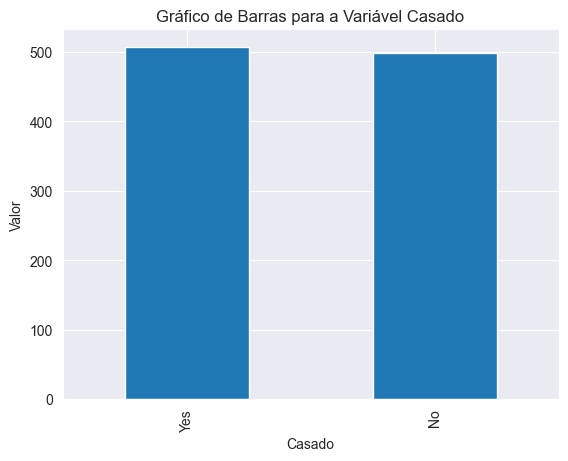

In [9]:
contagem_casado = df['Casado'].value_counts()
ax = contagem_casado.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Casado')
plt.xlabel('Casado')
plt.ylabel('Valor')
plt.show()

Vemos uma boa distribuiação dos dados

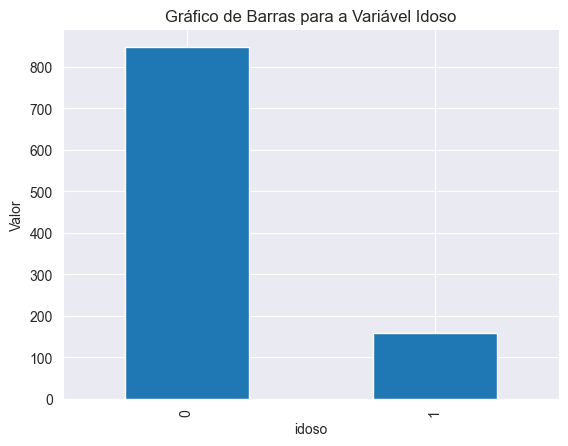

In [10]:
contagem_idoso = df['Idoso'].value_counts()
ax = contagem_idoso.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Idoso')
plt.xlabel('idoso')
plt.ylabel('Valor')
plt.show()

Nesse caso podemos notar uma clara desparidade na distribuição dos dados com os dados 0 (Não Idoso) sendo muito superior em quantidade

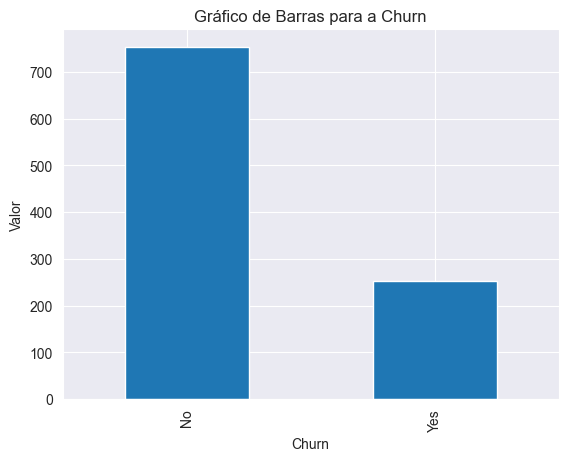

In [11]:
contagem_churn = df['Churn'].value_counts()
ax = contagem_churn.plot(kind='bar')
plt.title('Gráfico de Barras para a Churn')
plt.xlabel('Churn')
plt.ylabel('Valor')
plt.show()

Aqui também podemos notar uma grande desparidade entre o No(Não churn) para o Yes(churn)

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


No meu caso não encontrei nenhuma coluna que apresenta-se outlier portanto vou manter todos os dados

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

In [12]:
df['Genero'] = df['Genero'].replace('F', 'FEMALE')
df['Genero'] = df['Genero'].replace('M', 'MALE')

Correção do Datafreme da atividade passada

In [13]:
fig = px.histogram(df, x='Churn', color='Genero', barmode='stack')

fig.update_layout(title='Relação entre Churn e Gênero',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Gênero')
fig.show()

Podemos concluir que o genero FAMALE (Feminino) tem um maior número de churn, apesar da diferença em relação ao genero MALE(Masculino) ser bem pequena.

In [14]:
fig = px.histogram(df, x='Churn', color='Casado', barmode='stack')

fig.update_layout(title='Relação entre Churn e Casado',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Casado')
fig.show()

Também podemos concluir que pessoas solteiras tem um maior numero de churn

In [19]:
mediana = df.groupby('Churn')['Tempo_como_Cliente'].median().reset_index()

fig = px.bar(mediana, x='Churn', y='Tempo_como_Cliente',
             title='Média Tempo Como Cliente Para Churn')
fig.show()

Temos uma quantidade de dados favoravel a no(Não churn) em relação a yes(Churn), o que pode significar que em quanto mais tempo nosso cliente está com a nossa marca dificilmente ele vá dar churn.

In [21]:
media = df.groupby('Churn')['Pagamento_Mensal'].mean().reset_index()

fig = px.bar(media, x='Churn', y='Pagamento_Mensal',
             title='Pagamento mensal para Churn')
fig.show()

Nesse caso podemos notar que enquanto maior o pagamento mensal maiores as chances do nosso cliente dar churn

In [22]:
mediana = df.groupby('Churn')['Total_Pago'].mean().reset_index()

fig = px.bar(mediana, x='Churn', y='Total_Pago',
             title='Total Pago para Churn')
fig.show()

Temos menores quantidades de Churn para clientes que exibem uma maior media de total pago